<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Iris_dataset_NN_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Ejemplo 1:**
3 capas ocultas de 4 neuronas cada una con funciones de activación sigmoide. Usando gradiente estocástico con gradient clipping

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=4fa297079db5a8e9438f78a655f03767ff2201bf83acf59082eb9691e2b4ded0
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras-utils


In [ ]:
import keras
import keras_utils

from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.optimizer_v1 import SGD

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150, 3)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))                                 #crea modelo y con función sigmoide
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))

In [ ]:
optim=SGD(clipnorm=1)               #optimiza con esa función


In [ ]:
modelo.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=200)

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 1.1316 - accuracy: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1246 - accuracy: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1186 - accuracy: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1141 - accuracy: 0.3333
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 1.1103 - accuracy: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1069 - accuracy: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1047 - accuracy: 0.3333
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.3333
Epoch 9/200
15/15 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.3333
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3333
Epoch 11/

###**Ejemplo 2:**
3 capas ocultas de 4 neuronas cada una con funciones de activación ReLu, PReLU y SELU respectivamente.

In [ ]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


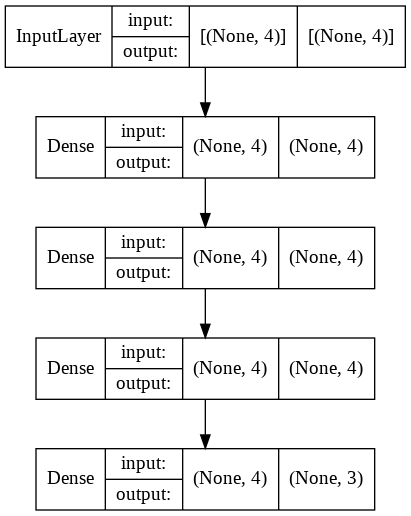

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(modelo,show_shapes=True,show_layer_names=False)      #muestra gráficamente las capas

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,PReLU,ReLU #Puedo importar las funciones
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4))                                                                   #crea el modelo con distintas activaciones y optimizador sgd
modelo.add(PReLU())
modelo.add(Dense(4,activation='selu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 p_re_lu (PReLU)             (None, 4)                 4         
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


###**Ejemplo 3:**
3 capas ocultas de 4 neuronas cada una con función de activación ReLU e inicialización Glorot Normal

In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.initializers import glorot_normal #Importar el inicializador

In [ ]:
data=load_iris()

In [ ]:
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
X.shape

(150, 4)

In [ ]:
glorotinit=glorot_normal()

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_initializer=glorotinit,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))                 # "glorot_normal" llama a glorotinit
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal'))              #ver función de glorot y he*
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

###**Ejemplo 4:**
3 capas ocultas de 4 neuronas cada una con función de activación ReLU y Batch Normalization en la segunda capa oculta.

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization #Importar BatchNorm
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4,activation='relu'))
modelo.add(BatchNormalization())        #el batch normalization normaliza el output de la capa anterior y paso a paso
                                        # para que aprenda cada capa más independientemente
modelo.add(Dense(4,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 83
Non-trainable params: 8
__________________________________________________________

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

###**Ejemplo 5:**
3 capas ocultas de 4 neuronas cada una con función de activación ReLU y regularización L2 en los pesos y regularización L1 en los bias.


In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.regularizers import l1,l2 #Importar Regularizadores
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
l2_reg=l2()
l1_reg=l1(0.001)

In [ ]:
modelo.add(Dense(4,activation='relu',kernel_regularizer=l2_reg,bias_regularizer=l1_reg,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))        #utiliza l2 como regularizador normal y l1 como bias
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dense(3,activation='softmax',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
 dense_28 (Dense)            (None, 4)                 16        
                                                      

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

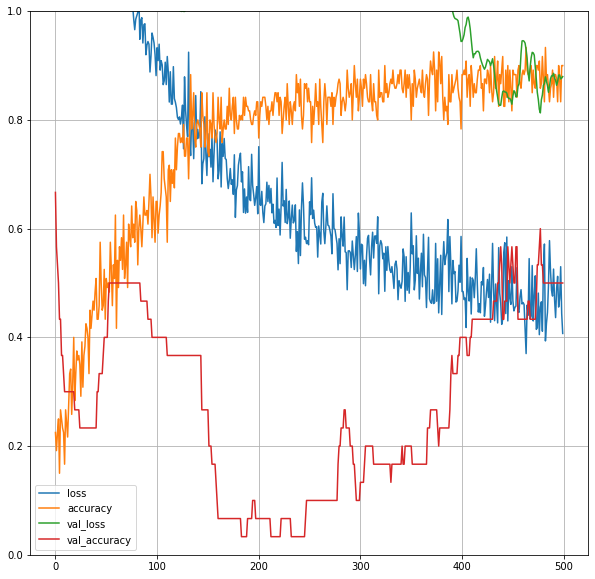

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # rango vertical[0-1]
plt.show()

###**Ejemplo 6**:
3 capas ocultas de 4 neuronas cada una con función de activación ReLU inicializadando los pesos con glorot_normal y los bias en cero. Aplicando regularización L2 de los pesos y L1 de los bias. Adicionalmente, se aplica Batch Normalization en la segunda capa oculta. Se entrena la red usando el optimizador Adam con Gradient Clipping y usando un 20% como datos de validación.


In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,input_dim=4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

^usa glorot como inicializador, sin bias inicial porque ya tiene las regularizaciones de bias de l1

In [ ]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_1 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                      

In [ ]:
history=modelo.fit(x=X,y=y,validation_split=0.2,epochs=500)

Epoch 1/500
4/4 [==============================] - 2s 183ms/step - loss: 1.6529 - accuracy: 0.2250 - val_loss: 1.2005 - val_accuracy: 0.6667
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 1.6749 - accuracy: 0.1917 - val_loss: 1.2073 - val_accuracy: 0.5667
Epoch 3/500
4/4 [==============================] - 0s 19ms/step - loss: 1.5723 - accuracy: 0.2250 - val_loss: 1.2148 - val_accuracy: 0.5333
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 1.6106 - accuracy: 0.2500 - val_loss: 1.2204 - val_accuracy: 0.5000
Epoch 5/500
4/4 [==============================] - 0s 19ms/step - loss: 1.6338 - accuracy: 0.1500 - val_loss: 1.2267 - val_accuracy: 0.4333
Epoch 6/500
4/4 [==============================] - 0s 19ms/step - loss: 1.5499 - accuracy: 0.2667 - val_loss: 1.2328 - val_accuracy: 0.4333
Epoch 7/500
4/4 [==============================] - 0s 18ms/step - loss: 1.5592 - accuracy: 0.2500 - val_loss: 1.2377 - val_accuracy: 0.3667
Epoch 8/500
4/4 [==

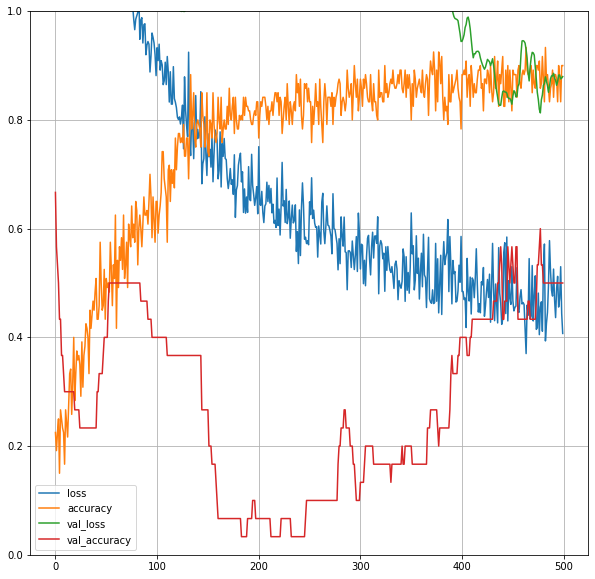

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # rango vertical[0-1]
plt.show()